In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data=pd.read_csv(r'/root/data/binary.csv')

In [3]:
data = pd.read_csv(r'/root/data/binary.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
admit    400 non-null int64
gre      400 non-null int64
gpa      400 non-null float64
rank     400 non-null int64
dtypes: float64(1), int64(3)
memory usage: 12.6 KB


In [5]:
data.describe()

,admit,gre,gpa,rank
count,400.000000,400.000000,400.000000,400.00000
mean,0.317500,587.700000,3.389900,2.48500
std,0.466087,115.516536,0.380567,0.94446
min,0.000000,220.000000,2.260000,1.00000
25%,0.000000,520.000000,3.130000,2.00000
50%,0.000000,580.000000,3.395000,2.00000
75%,1.000000,660.000000,3.670000,3.00000
max,1.000000,800.000000,4.000000,4.00000


In [6]:
data.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


(array([ 3.,  4., 16., 34., 42., 57., 76., 66., 39., 63.]),
 array([2.26 , 2.434, 2.608, 2.782, 2.956, 3.13 , 3.304, 3.478, 3.652,
        3.826, 4.   ]),
 <a list of 10 Patch objects>)

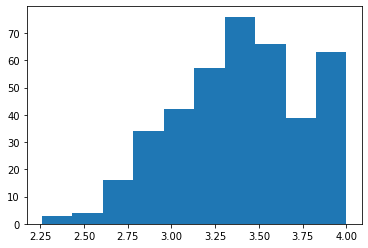

In [7]:
plt.hist(data['gpa'])

Text(0.5, 0, 'GPA')

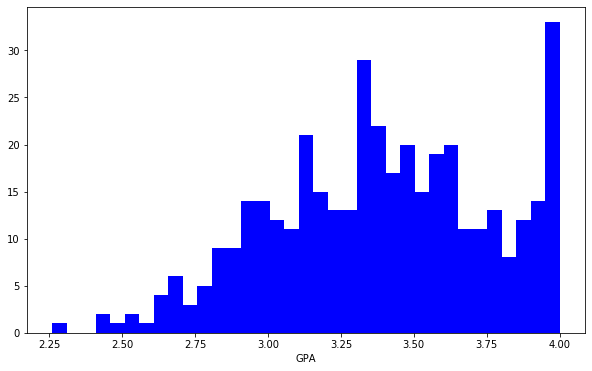

In [8]:
plt.figure(figsize=(10,6))
plt.hist(data['gpa'], bins=35, color='blue')
plt.xlabel("GPA")

Text(0.5, 0, 'GPA')

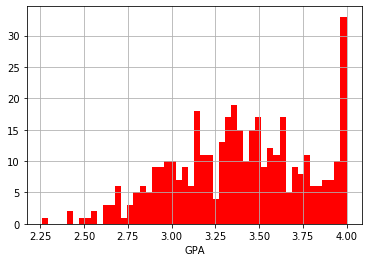

In [9]:
data['gpa'].hist(bins=50, color='red')
plt.xlabel("GPA")

Text(0.5, 0, 'GRE')

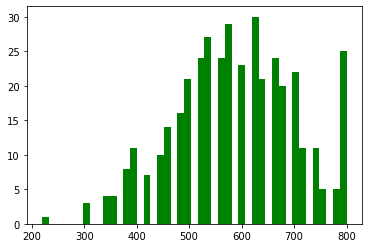

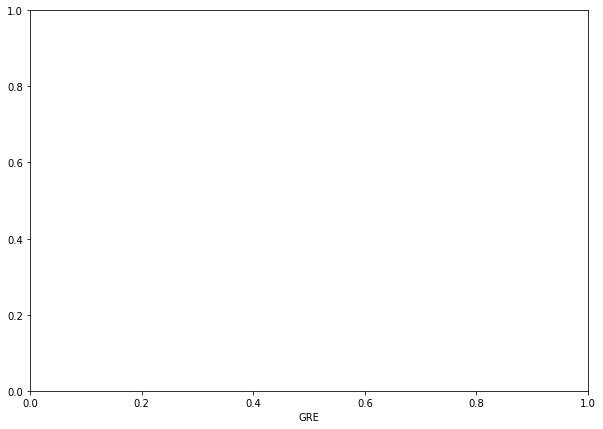

In [10]:
plt.hist(data['gre'], bins=45, color='green')
plt.figure(figsize=(10,7))
plt.xlabel("GRE")

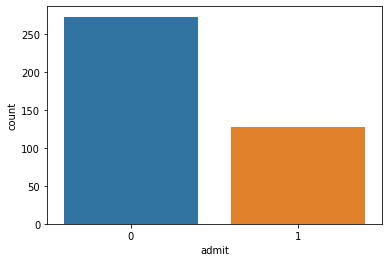

In [11]:
sns.countplot(data['admit'])

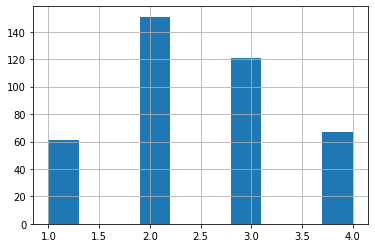

In [12]:
data['rank'].hist()

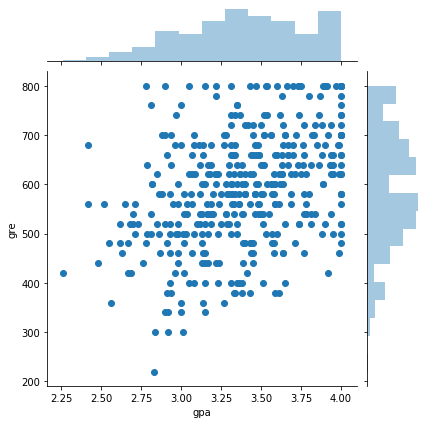

In [13]:
sns.jointplot('gpa','gre',data=data)

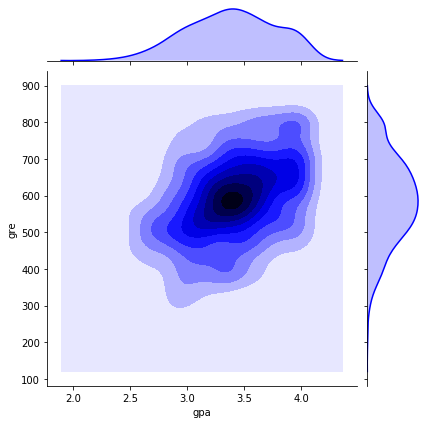

In [14]:
sns.jointplot('gpa','gre',data=data,color='blue', kind='kde')

In [15]:
1,2,3,4 = 0, 1 rank1, rank2, rank3, rank4

SyntaxError: invalid syntax (<ipython-input-15-5adb05efead0>, line 1)

In [21]:
dummy_ranks = pd.get_dummies(data['rank'], prefix = 'rank')

In [22]:
dummy_ranks.head()
# There is multicollineality
# We remove multicollineality by removing the first dummy

,rank_1,rank_2,rank_3,rank_4
0,0,0,1,0
1,0,0,1,0
2,1,0,0,0
3,0,0,0,1
4,0,0,0,1


In [23]:
cols_we_need = ['admit','gre','gpa']


In [24]:
data = data[cols_we_need].join(dummy_ranks.ix[:,'rank_2':])

/root/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
/root/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:822: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  retval = getattr(retval, self.name)._getitem_axis(key, axis=i)


In [25]:
data.head()

,admit,gre,gpa,rank_2,rank_3,rank_4
0,0,380,3.61,0,1,0
1,1,660,3.67,0,1,0
2,1,800,4.00,0,0,0
3,1,640,3.19,0,0,1
4,0,520,2.93,0,0,1


### Logistic regression model1

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
data.columns

Index(['admit', 'gre', 'gpa', 'rank_2', 'rank_3', 'rank_4'], dtype='object')

In [28]:
X = data[['gre', 'gpa', 'rank_2', 'rank_3', 'rank_4']]
y = data['admit']

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=200 )

In [30]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(280, 5) (120, 5) (280,) (120,)


In [31]:
print(X_train.size, X_test.size, y_train.size, y_test.size)

1400 600 280 120


In [32]:
from sklearn.linear_model import LogisticRegression

In [42]:
model = LogisticRegression()

In [43]:
model.fit(X_train, y_train)

/root/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [44]:
prediction = model.predict(X_test)

In [45]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [46]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.77      0.91      0.84        89
           1       0.47      0.23      0.30        31

    accuracy                           0.73       120
   macro avg       0.62      0.57      0.57       120
weighted avg       0.69      0.73      0.70       120



In [47]:
accuracy_score(y_test, prediction)

0.7333333333333333

In [40]:
confusion_matrix(y_test, prediction)

array([[81,  8],
       [24,  7]])

The model was 100% accurate, while I run my model

### Model2

In [48]:
X = data[['gre', 'gpa']]
y = data['admit']

In [49]:
print(X.shape,y.shape )

(400, 2) (400,)


In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=23)

In [51]:
print(X_train.shape, X_test.shape)

(280, 2) (120, 2)


In [52]:
print(y_train.shape, y_test.shape)

(280,) (120,)


In [53]:
model2 = LogisticRegression()

In [54]:
model2.fit(X_train,y_train)

/root/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [56]:
prediction2 = model2.predict(X_test)

In [59]:
print(classification_report(y_test,prediction2))

              precision    recall  f1-score   support

           0       0.73      1.00      0.85        88
           1       0.00      0.00      0.00        32

    accuracy                           0.73       120
   macro avg       0.37      0.50      0.42       120
weighted avg       0.54      0.73      0.62       120



/root/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [60]:
print(accuracy_score(y_test, prediction2))

0.7333333333333333


In [61]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.74      0.89      0.81        88
           1       0.33      0.16      0.21        32

    accuracy                           0.69       120
   macro avg       0.54      0.52      0.51       120
weighted avg       0.63      0.69      0.65       120



The first model is better than our second model